In [96]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [98]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [99]:
!wget $data -O data-week-4.csv

--2023-10-12 19:03:18--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data-week-4.csv’

data-week-4.csv     100%[===================>]   1.41M  --.-KB/s    in 0.08s   

2023-10-12 19:03:18 (17.8 MB/s) - ‘data-week-4.csv’ saved [1475504/1475504]



In [100]:
df = pd.read_csv('data-week-4.csv')

In [101]:
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


## Data preparation
* Keep only the columns above.
* Lowercase the column names and replace spaces with underscores.
* Fill the missing values with 0.
* Make the price binary (1 if above the average, 0 otherwise) - this will be our target variable above_average.
* Split the data into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split function for that with random_state=1.

In [102]:
df.drop(['Engine Fuel Type','Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Popularity'], axis=1, inplace=True)
columns = df.columns

In [103]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [104]:
df = df.fillna(0)

In [105]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [106]:
df.rename(columns={'msrp': 'price'}, inplace=True)

In [107]:
mean = df.price.mean()
df['above_average'] = np.where(df.price > mean, 1, 0)

In [108]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

In [109]:
df

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0
...,...,...,...,...,...,...,...,...,...,...,...
11909,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,46120,1
11910,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,56670,1
11911,Acura,ZDX,2012,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50620,1
11912,Acura,ZDX,2013,300.0,6.0,AUTOMATIC,4dr Hatchback,23,16,50920,1


In [110]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

df_train = df_train.drop(columns=['price', 'above_average'], axis=1)
df_val = df_val.drop(columns=['price', 'above_average'], axis=1 )
df_test = df_test.drop(columns=['price', 'above_average'], axis=1 )

In [111]:
y_val,y_test.shape

(array([1, 0, 0, ..., 0, 1, 0]), (2383,))

In [112]:
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']
numerical = ['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [113]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Toyota,Highlander Hybrid,2016,280.0,6.0,AUTOMATIC,4dr SUV,28,27
1,Chevrolet,Impala Limited,2014,300.0,6.0,AUTOMATIC,Sedan,30,18
2,Buick,Regal,2016,259.0,4.0,AUTOMATIC,Sedan,27,19
3,Volkswagen,CC,2015,280.0,6.0,AUTOMATED_MANUAL,Sedan,25,17
4,Dodge,Grand Caravan,2016,283.0,6.0,AUTOMATIC,Passenger Minivan,25,17


##Question 1: ROC AUC feature importance
ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the above_average variable
Use the training dataset for that
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. -df_train['engine_hp'])

AUC can go below 0.5 if the variable is negatively correlated with the target variable. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* engine_hp
* engine_cylinders
* highway_mpg
* city_mpg

In [114]:
from sklearn.metrics import roc_auc_score

In [115]:
numerical_AUC = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']

In [116]:
for c in numerical_AUC:
  AUC = roc_auc_score(y_train, df_train[c])
  if AUC < .5:
    AUC = roc_auc_score(y_train, -df_train[c])

  print(f'AUC is {AUC.round(3)} for column {c}')

AUC is 0.917 for column engine_hp
AUC is 0.766 for column engine_cylinders
AUC is 0.633 for column highway_mpg
AUC is 0.673 for column city_mpg


##Question 2: Training the model
Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
What's the AUC of this model on the validation dataset? (round to 3 digits)

* 0.678
* 0.779
* 0.878
* 0.979

In [117]:
def train(df_train, y_train, C = 1.):
  train_dicts = df_train[categorical + numerical].to_dict(orient='records')
  dv = DictVectorizer(sparse=False)
  X_train = dv.fit_transform(train_dicts)

  model = LogisticRegression(solver='liblinear', C=C, max_iter=1000)
  model.fit(X_train, y_train)

  return dv, model

In [118]:
def predict(df, dv, model):
  dicts_full_train = df[categorical + numerical].to_dict(orient='records')

  X = dv.transform(dicts_full_train)
  y_pred = model.predict_proba(X)[:, 1]
  return y_pred


In [119]:
dv, model = train(df_train, y_train)

In [120]:
y_predict = predict(df_val, dv, model)

In [121]:
y_val.shape, y_predict.shape

((2383,), (2383,))

In [122]:
print('Roc_auc_score is: ',roc_auc_score(y_val, y_predict).round(4))

Roc_auc_score is:  0.9797


##Question 3: Precision and Recall
Now let's compute precision and recall for our model.

* Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
* For each threshold, compute precision and recall
* Plot them

At which threshold precision and recall curves intersect?

* 0.28
* 0.48
* 0.68
* 0.88

In [123]:
from sklearn.metrics import precision_recall_curve

In [124]:
precision, recall, thresholds = precision_recall_curve(y_val, y_predict)

In [125]:
len(precision), len(recall), len(thresholds)

(1989, 1989, 1988)

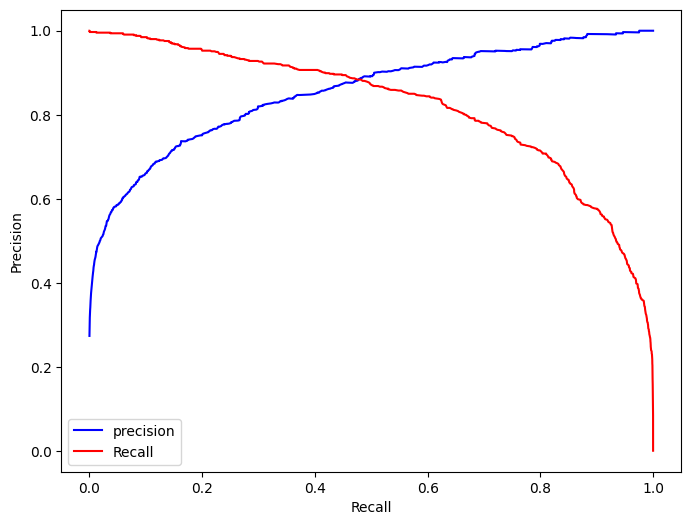

In [126]:
plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], color='blue', label='precision')
plt.plot(thresholds, recall[:-1], color='RED',  label='Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()


##Question 4: F1 score
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

 $F_{1} = 2\cdot\frac{P \cdot R}{P + R}$

Where
 $P$ is precision and
 $R$ is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?

* 0.12
* 0.32
* 0.52
* 0.72

In [127]:
from sklearn.metrics import f1_score

In [128]:
max_f1_score = 0
optimal_threshold = 0

for threshold in np.arange(0., 1. ,0.01):

    y_predict = (y_predict >= threshold).astype(int)
    precision = np.sum((y_predict == 1) & (y_val == 1)) / np.sum(y_predict == 1)
    recall = np.sum((y_predict == 1) & (y_val == 1)) / np.sum(y_val == 1)

    f1 = 2 * (precision * recall) / (precision + recall)

    if f1 > max_f1_score:
        max_f1_score = f1
        optimal_threshold = threshold

print("Optimal Threshold for Maximal F1 Score:", optimal_threshold)
print("Maximal F1 Score:", max_f1_score)

Optimal Threshold for Maximal F1 Score: 0.0
Maximal F1 Score: 0.43068817912413565


##Question 5: 5-Fold CV
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

KFold(n_splits=5, shuffle=True, random_state=1)
* Iterate over different folds of df_full_train.
* Split the data into train and validation.
* Train the model on train with these parameters: LogisticRegression.(solver='liblinear', C=1.0, max_iter=1000)
* Use AUC to evaluate the model on validation.

How large is standard deviation of the scores across different folds?

* 0.003
* 0.030
* 0.090
* 0.140

In [129]:
!pip install tqdm


In [130]:
from tqdm.auto import tqdm
from sklearn.model_selection import KFold

In [131]:
df_full_train.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'above_average'],
      dtype='object')

In [132]:
n_splits = 5


kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

scores = []

for train_idx, val_idx in kfold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.above_average.values
    y_val = df_val.above_average.values

    dv, model = train(df_train, y_train)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.979 +- 0.002


##Question 6: Hyperparameter Tuning
Now let's use 5-Fold cross-validation to find the best parameter C

* Iterate over the following C values: [0.01, 0.1, 0.5, 10]
* Initialize KFold with the same parameters as previously
* Use these parameters for the model: LogisticRegression(solver='liblinear', C=C, max_iter=1000)
* Compute the mean score as well as the std (round the mean and std to 3 decimal digits)

Which C leads to the best mean score?

* 0.01
* 0.1
* 0.5
* 10

If you have ties, select the score with the lowest std. If you still have ties, select the smallest C.

In [133]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
333,Nissan,370Z,2016,332.0,6.0,MANUAL,Coupe,26,18,29990,0
939,Porsche,911,2016,350.0,6.0,MANUAL,Convertible,26,19,102930,1
5675,Volkswagen,GTI,2013,200.0,4.0,MANUAL,4dr Hatchback,31,21,28795,0
10252,Chevrolet,Tahoe Limited/Z71,2000,255.0,8.0,AUTOMATIC,4dr SUV,15,11,3465,0
7155,Lincoln,Navigator,2016,380.0,6.0,AUTOMATIC,4dr SUV,20,15,73645,1
...,...,...,...,...,...,...,...,...,...,...,...
2895,Bentley,Continental,2003,420.0,8.0,AUTOMATIC,Coupe,15,10,328990,1
10955,Toyota,Tundra,2015,381.0,8.0,AUTOMATIC,Crew Cab Pickup,17,13,47975,1
905,Saab,900,1997,150.0,4.0,MANUAL,4dr Hatchback,26,18,2000,0
5192,Pontiac,G6,2009,164.0,4.0,AUTOMATIC,Coupe,33,22,22220,0


In [134]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.above_average
        y_val = df_val.above_average

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.935 +- 0.003
C=0.01 0.952 +- 0.003
C=0.1 0.972 +- 0.002
C=0.5 0.977 +- 0.002
C=1 0.979 +- 0.002
C=5 0.981 +- 0.003
C=10 0.981 +- 0.003
